In [23]:
library(ggplot2) # for graphs
library(dotenv) # for hiding your secret stuff in shared code
library(reshape2) # data manipulation
library(dplyr) # super duper data manipulation
library(scales) # axis formating tools
library(repr) # modify plot sizes in jupyter notebook


Attaching package: ‘reshape2’

The following object is masked from ‘package:tidyr’:

    smiths



In [2]:
# Change plot size to 10 x 8
options(repr.plot.width=10, repr.plot.height=8)

## For secret stuff

## For database access

In [3]:
data(diamonds)

In [4]:
head(diamonds)

carat cut       color clarity depth table price x    y    z   
1 0.23  Ideal     E     SI2     61.5  55    326   3.95 3.98 2.43
2 0.21  Premium   E     SI1     59.8  61    326   3.89 3.84 2.31
3 0.23  Good      E     VS1     56.9  65    327   4.05 4.07 2.31
4 0.29  Premium   I     VS2     62.4  58    334   4.20 4.23 2.63
5 0.31  Good      J     SI2     63.3  58    335   4.34 4.35 2.75
6 0.24  Very Good J     VVS2    62.8  57    336   3.94 3.96 2.48

In [5]:
summary(diamonds)

     carat               cut        color        clarity          depth      
 Min.   :0.2000   Fair     : 1610   D: 6775   SI1    :13065   Min.   :43.00  
 1st Qu.:0.4000   Good     : 4906   E: 9797   VS2    :12258   1st Qu.:61.00  
 Median :0.7000   Very Good:12082   F: 9542   SI2    : 9194   Median :61.80  
 Mean   :0.7979   Premium  :13791   G:11292   VS1    : 8171   Mean   :61.75  
 3rd Qu.:1.0400   Ideal    :21551   H: 8304   VVS2   : 5066   3rd Qu.:62.50  
 Max.   :5.0100                     I: 5422   VVS1   : 3655   Max.   :79.00  
                                    J: 2808   (Other): 2531                  
     table           price             x                y         
 Min.   :43.00   Min.   :  326   Min.   : 0.000   Min.   : 0.000  
 1st Qu.:56.00   1st Qu.:  950   1st Qu.: 4.710   1st Qu.: 4.720  
 Median :57.00   Median : 2401   Median : 5.700   Median : 5.710  
 Mean   :57.46   Mean   : 3933   Mean   : 5.731   Mean   : 5.735  
 3rd Qu.:59.00   3rd Qu.: 5324   3rd Qu.:

## The ggplot template
         ggplot( data={your dataframe}, aes({your visual encodings})) + geom_{some graph type}

## Visual Encodings

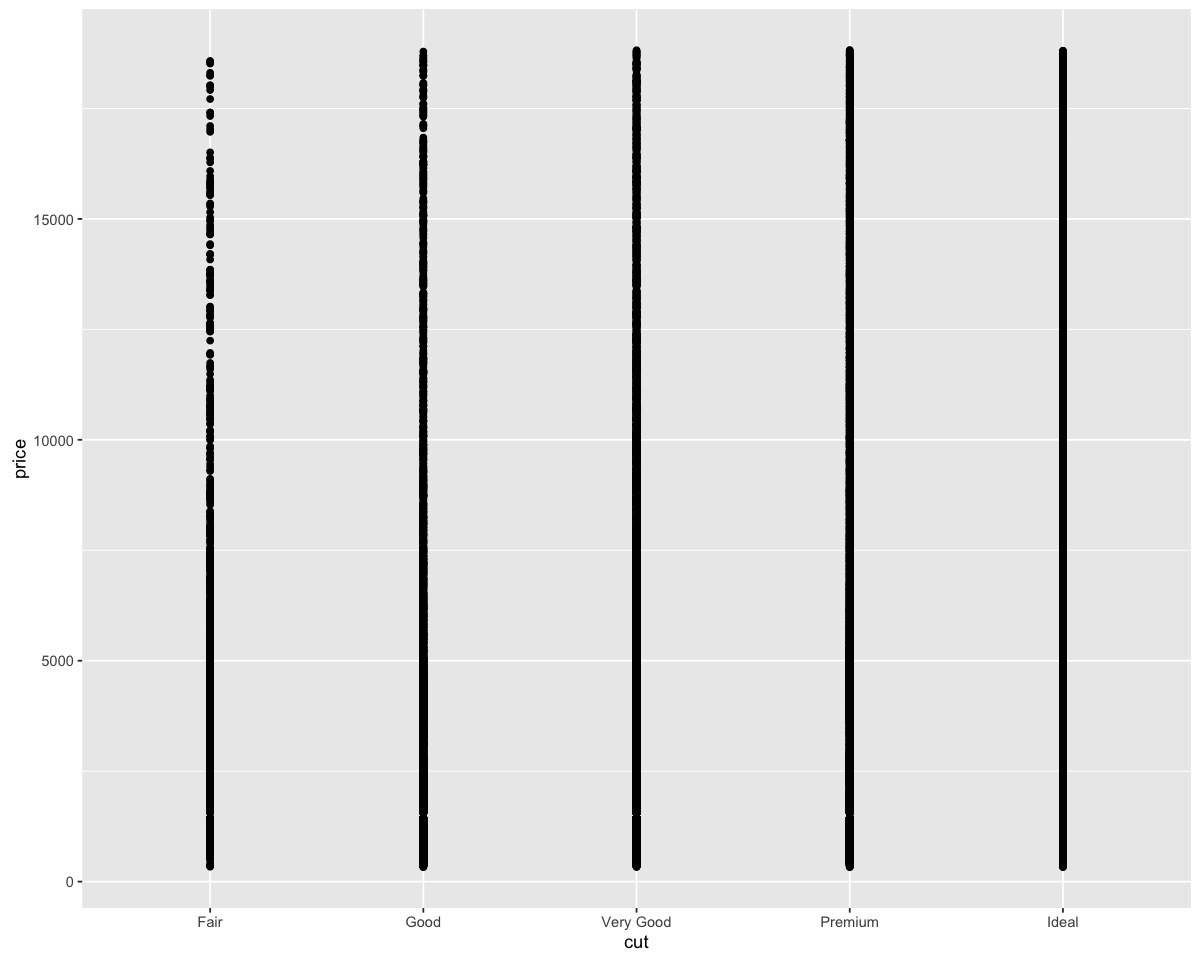

In [6]:
ggplot(diamonds, aes(x=cut, y=price)) + geom_point()

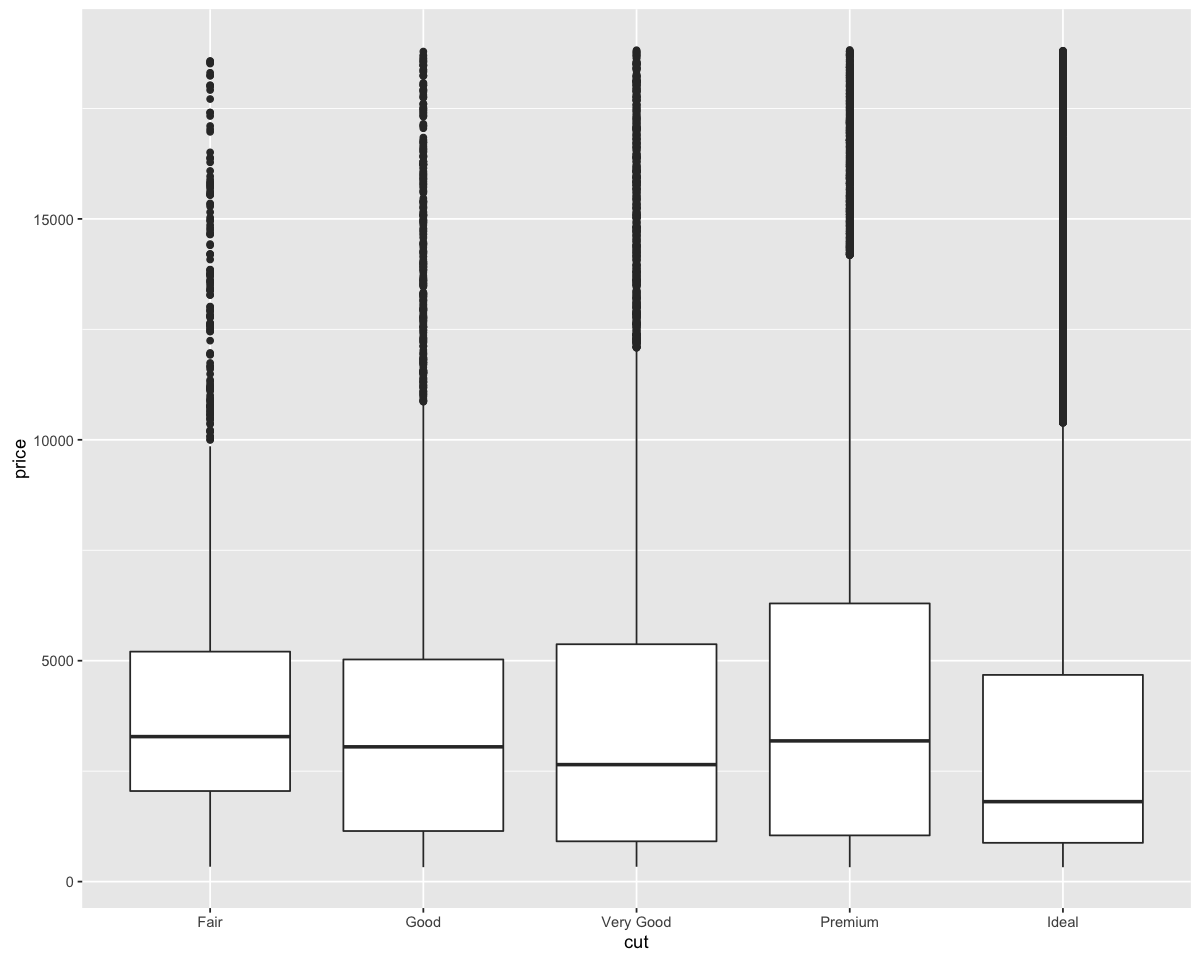

In [7]:
ggplot(diamonds, aes(x=cut, y=price)) + geom_boxplot()

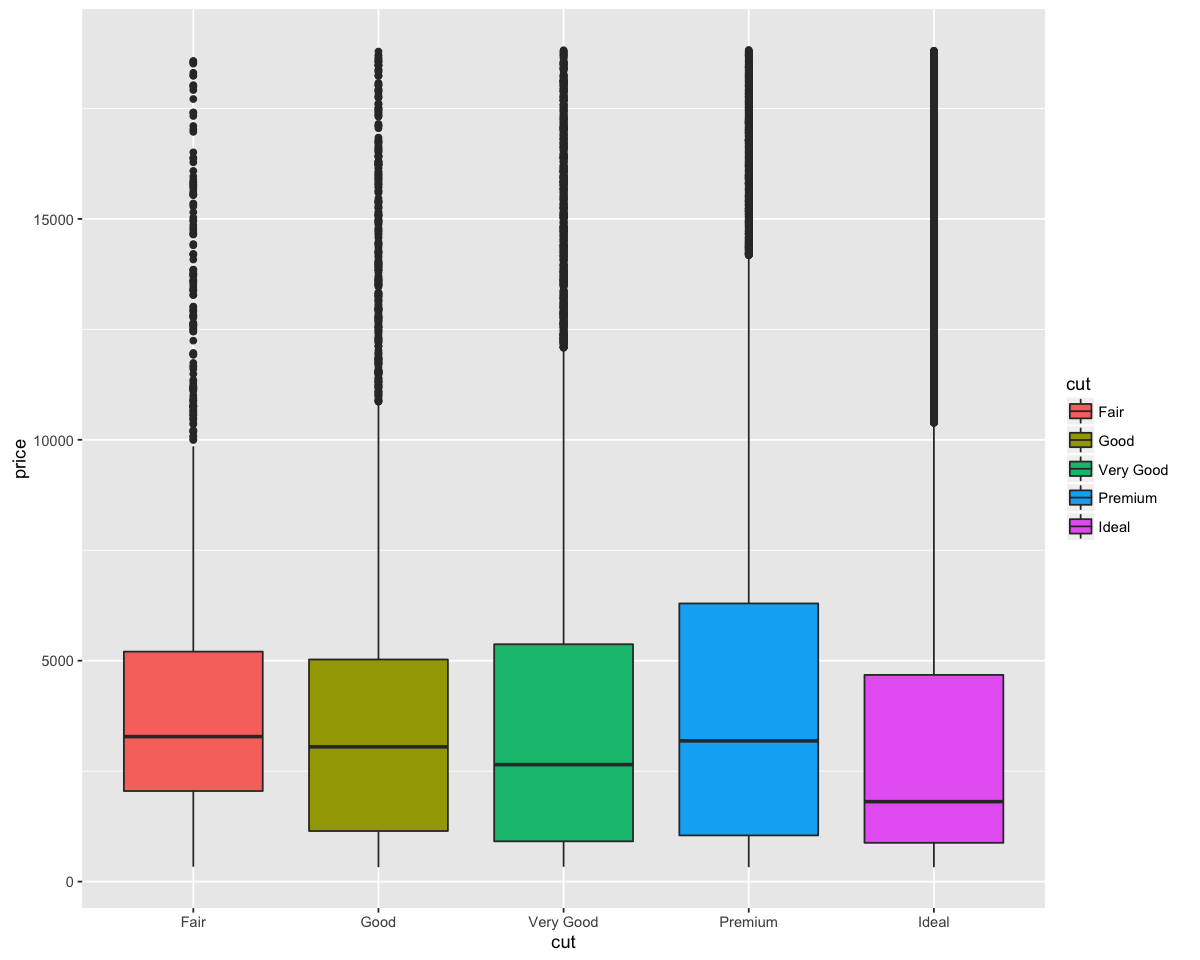

In [8]:
ggplot(diamonds, aes(x=cut, y=price, fill=cut)) + geom_boxplot()

## Annotate! Pointing out the important stuff 

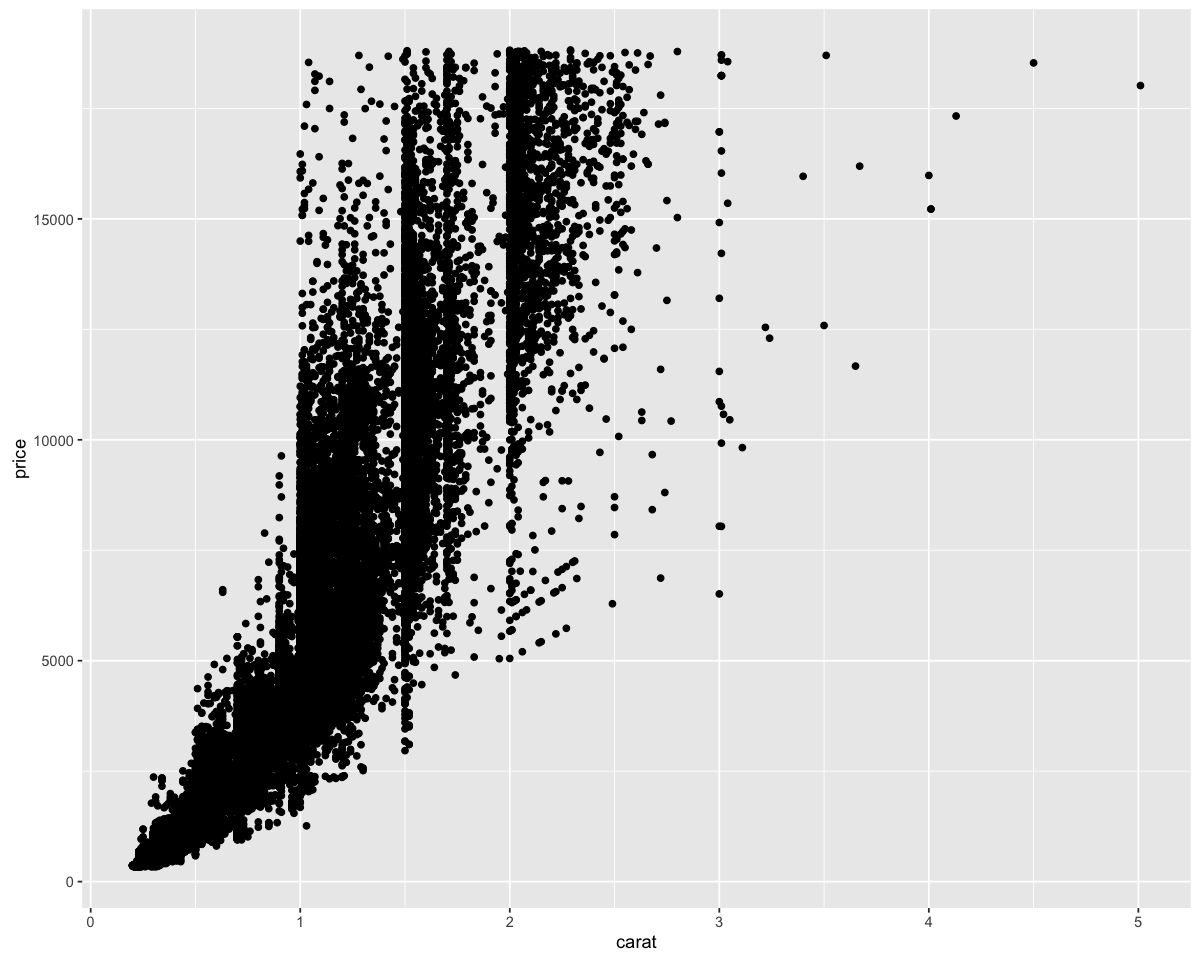

In [9]:
ggplot(diamonds, aes(x=carat, y=price)) + geom_point()

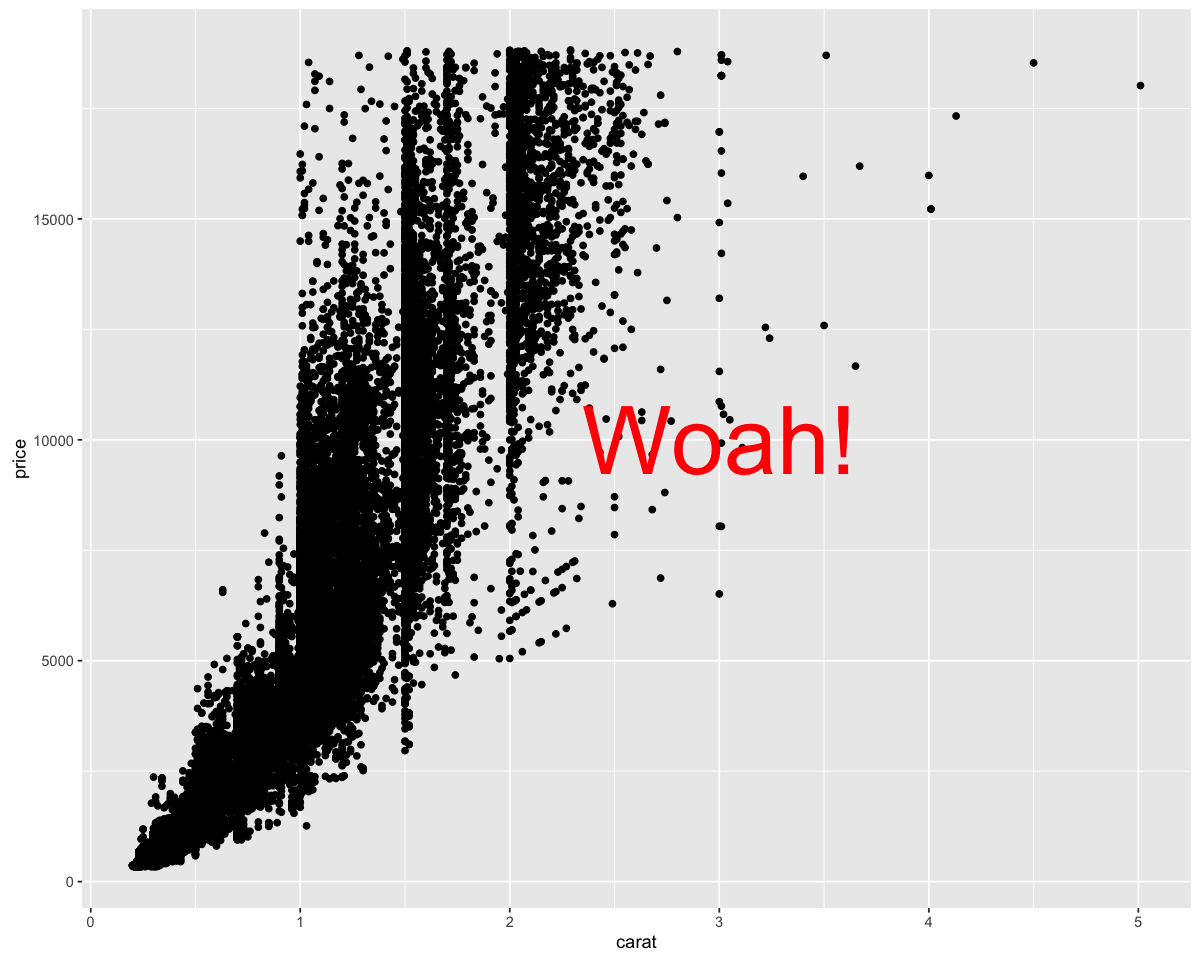

In [10]:
ggplot(diamonds, aes(x=carat, y=price)) + 
geom_point() +
annotate(geom = 'text', x = 3, y= 10000, label="Woah!", color='red', size = 20)

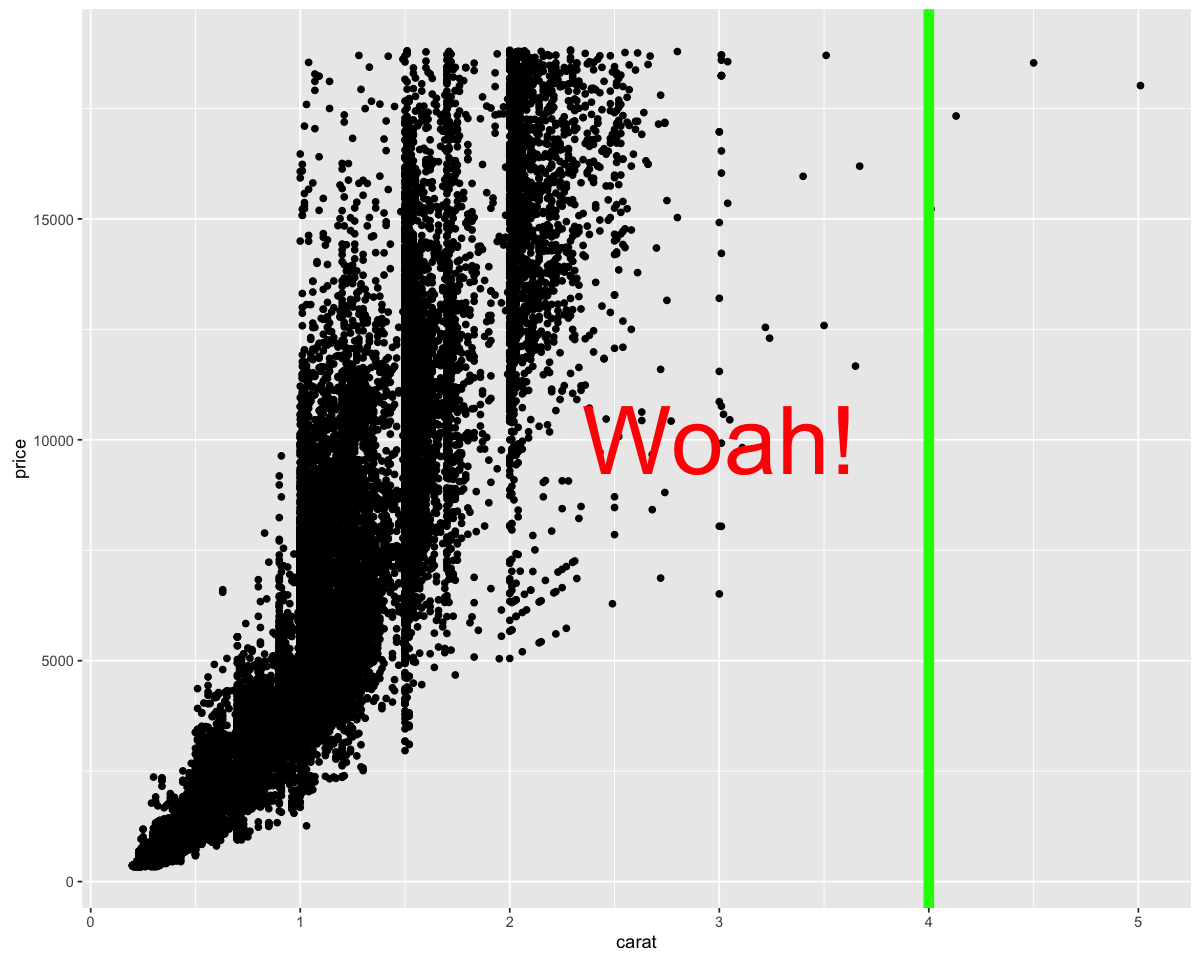

In [11]:
ggplot(diamonds, aes(x=carat, y=price)) + 
geom_point() +
annotate(geom = 'text', x = 3, y= 10000, label="Woah!", color='red', size = 20) +
geom_vline(aes(xintercept=4), size =3 , color='green')

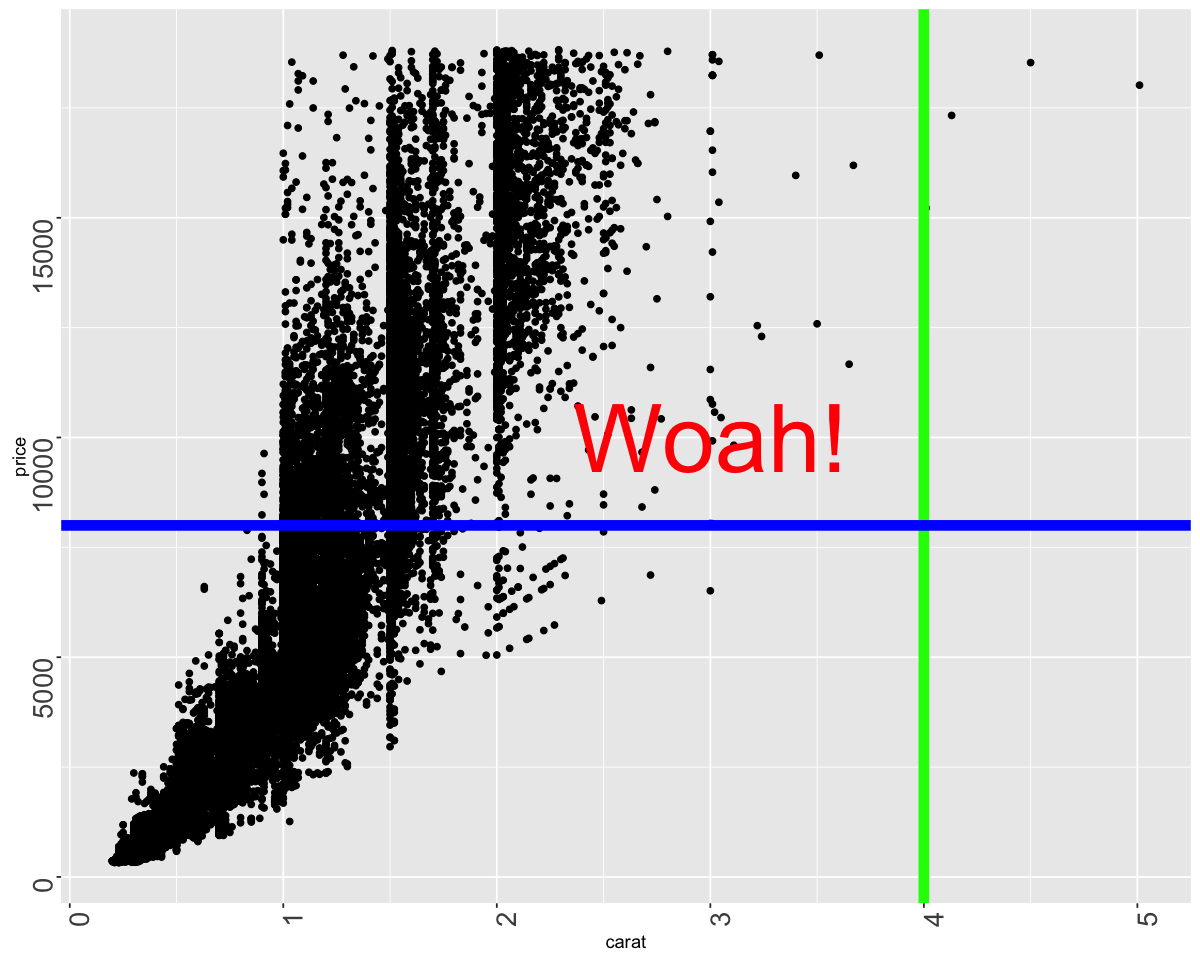

In [12]:
ggplot(diamonds, aes(x=carat, y=price)) + 
geom_point() +
annotate(geom = 'text', x = 3, y= 10000, label="Woah!", color='red', size = 20) +
geom_vline(aes(xintercept=4), size =3 , color='green') +
geom_hline(aes(yintercept=8000), size =3 , color='blue') +
theme(axis.text = element_text(size = rel(1.5), angle = 90))

## WHAT ARE FACETS?!?!

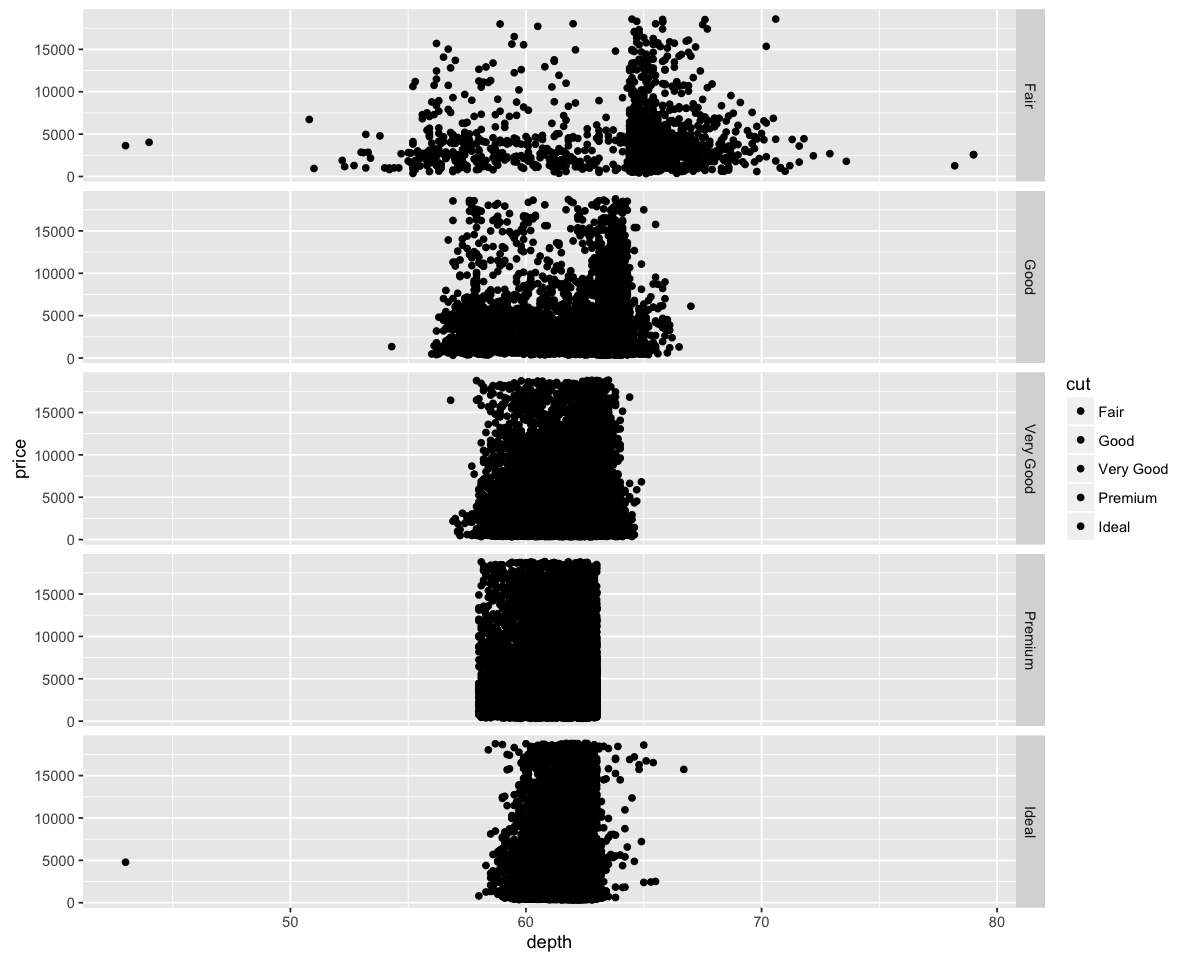

In [13]:
ggplot(diamonds, aes(x=depth, y=price, fill=cut)) + 
    geom_point() +
    facet_grid(cut~.)

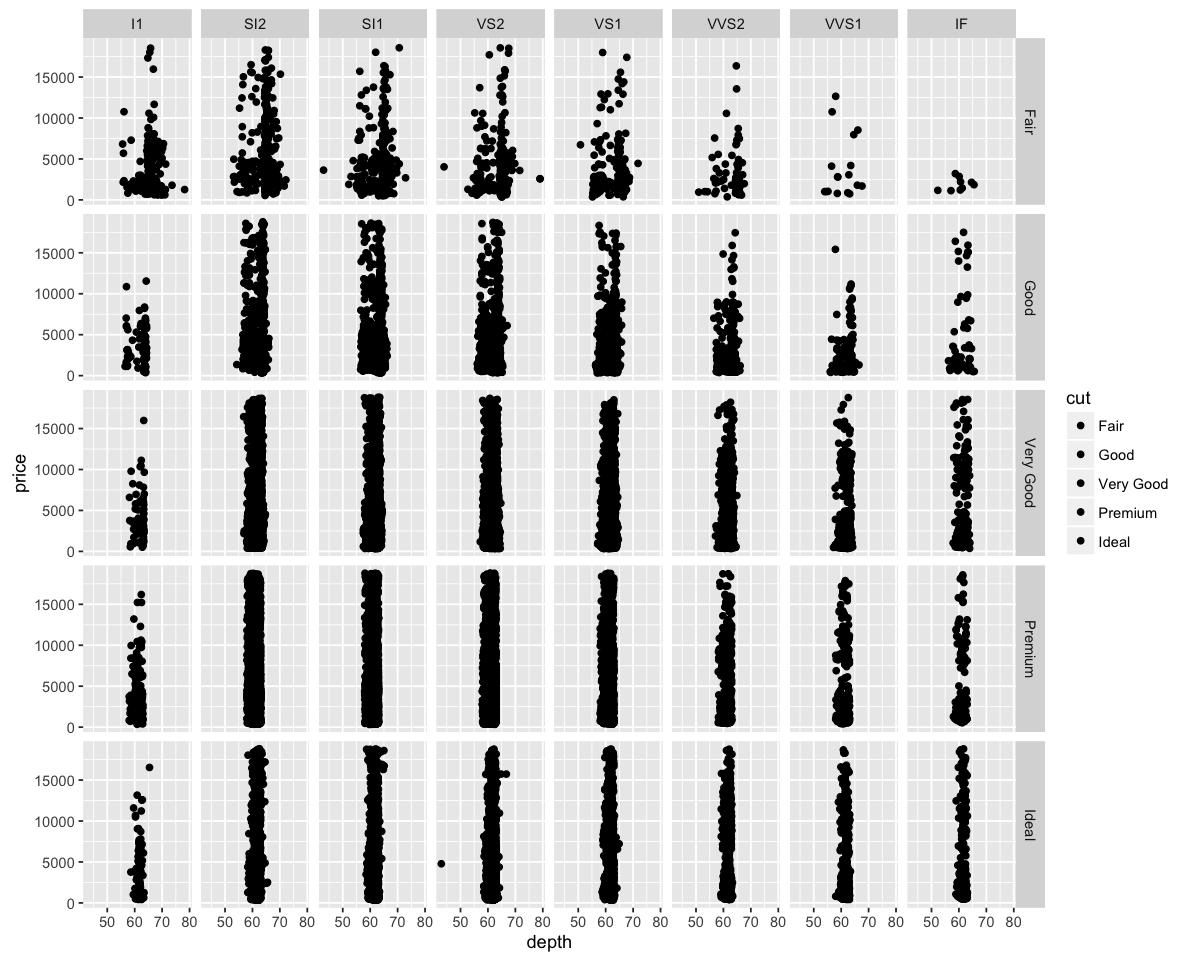

In [14]:
ggplot(diamonds, aes(x=depth, y=price, fill=cut)) + 
    geom_point() +
    facet_grid(cut~clarity)

## Jitterfy

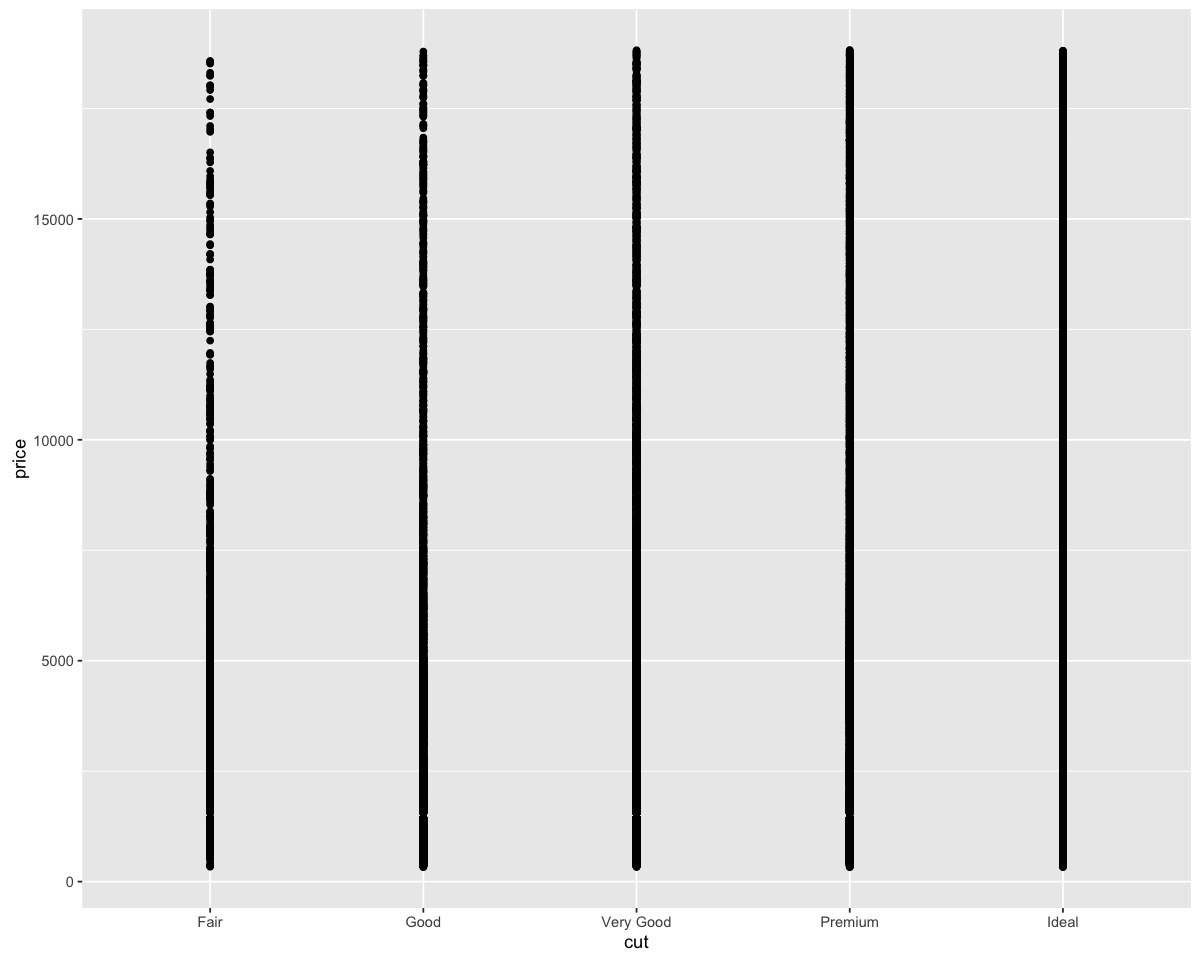

In [6]:
ggplot(diamonds, aes(x=cut, y=price)) + geom_point()

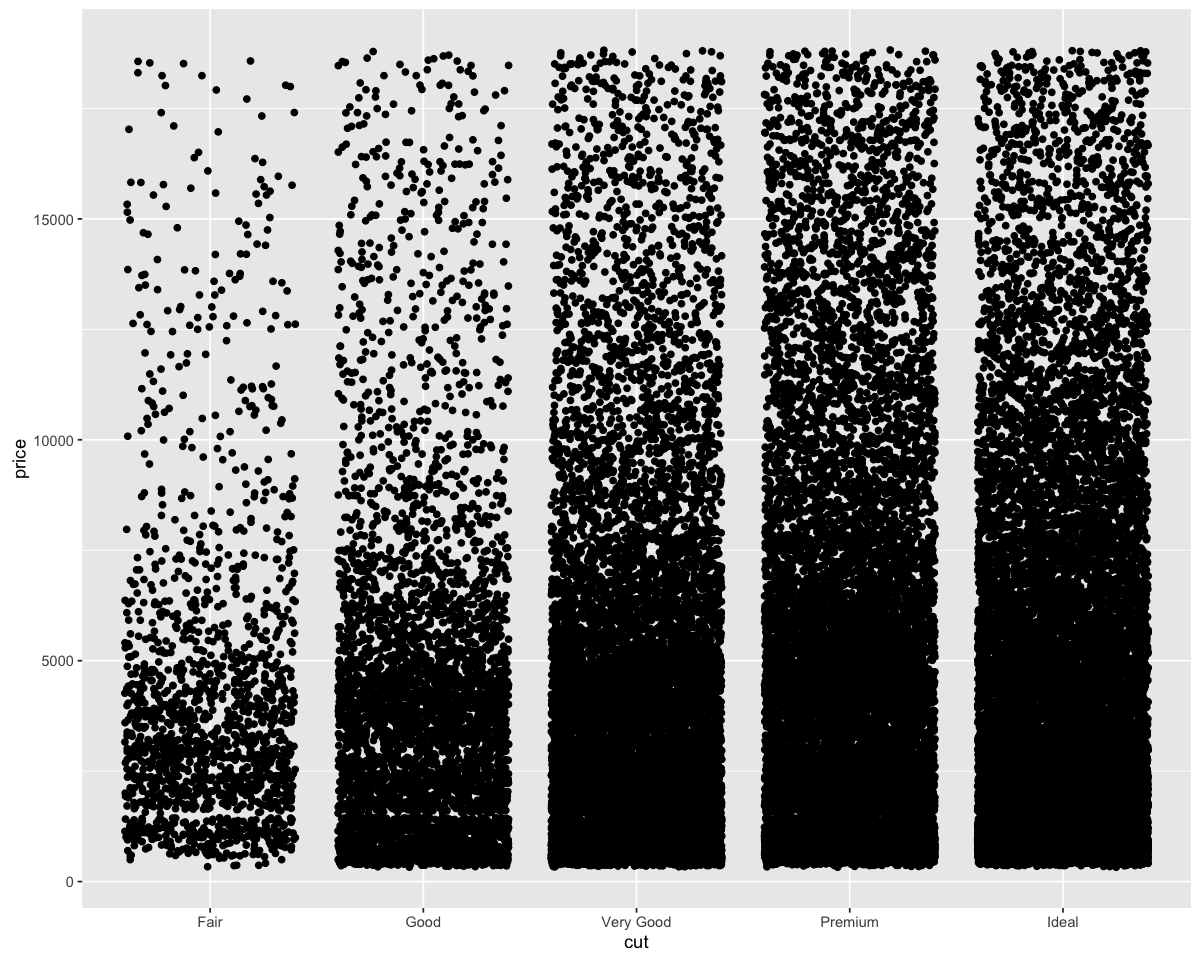

In [15]:
ggplot(diamonds, aes(x=cut, y=price)) + geom_jitter()

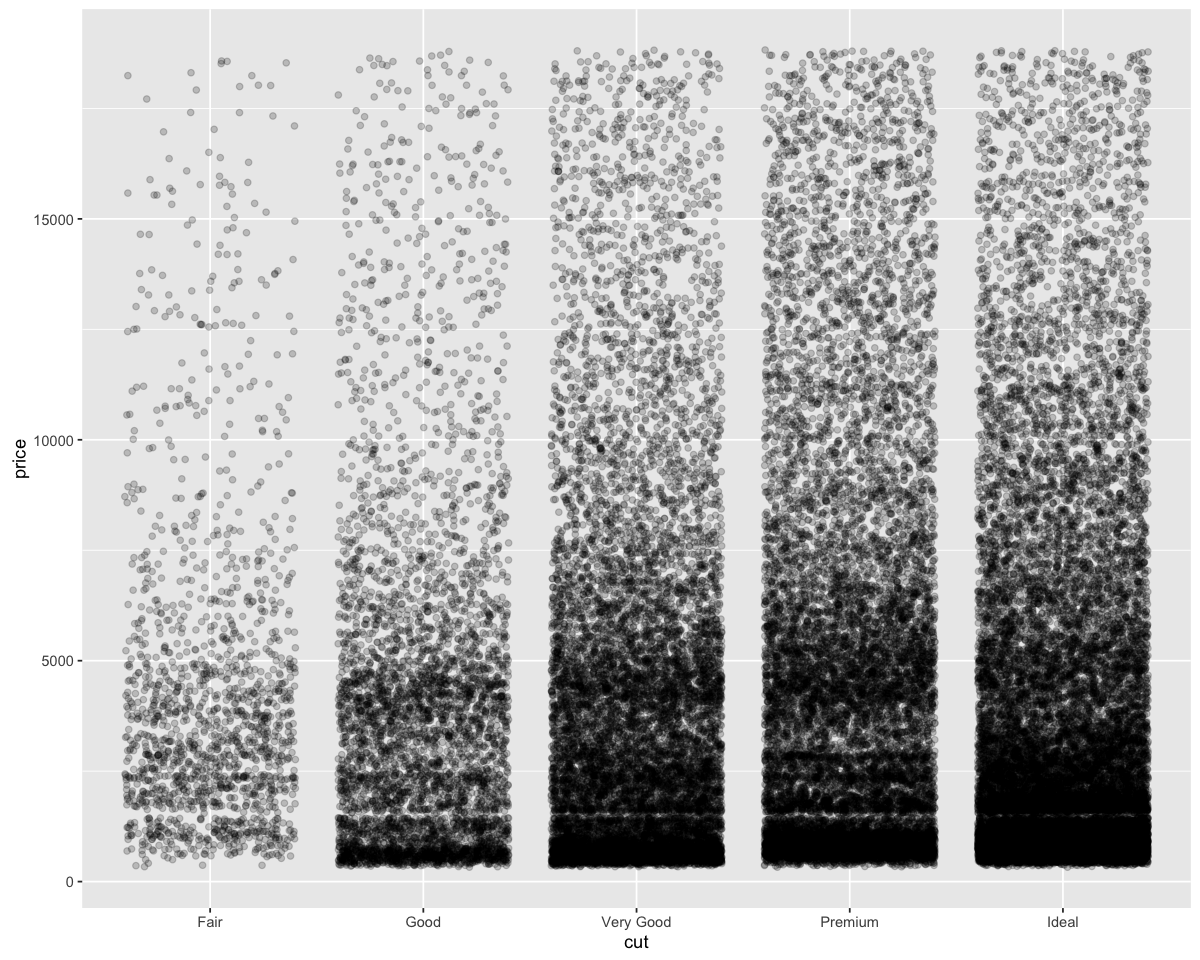

In [16]:
ggplot(diamonds, aes(x=cut, y=price)) + geom_jitter(alpha=0.2)

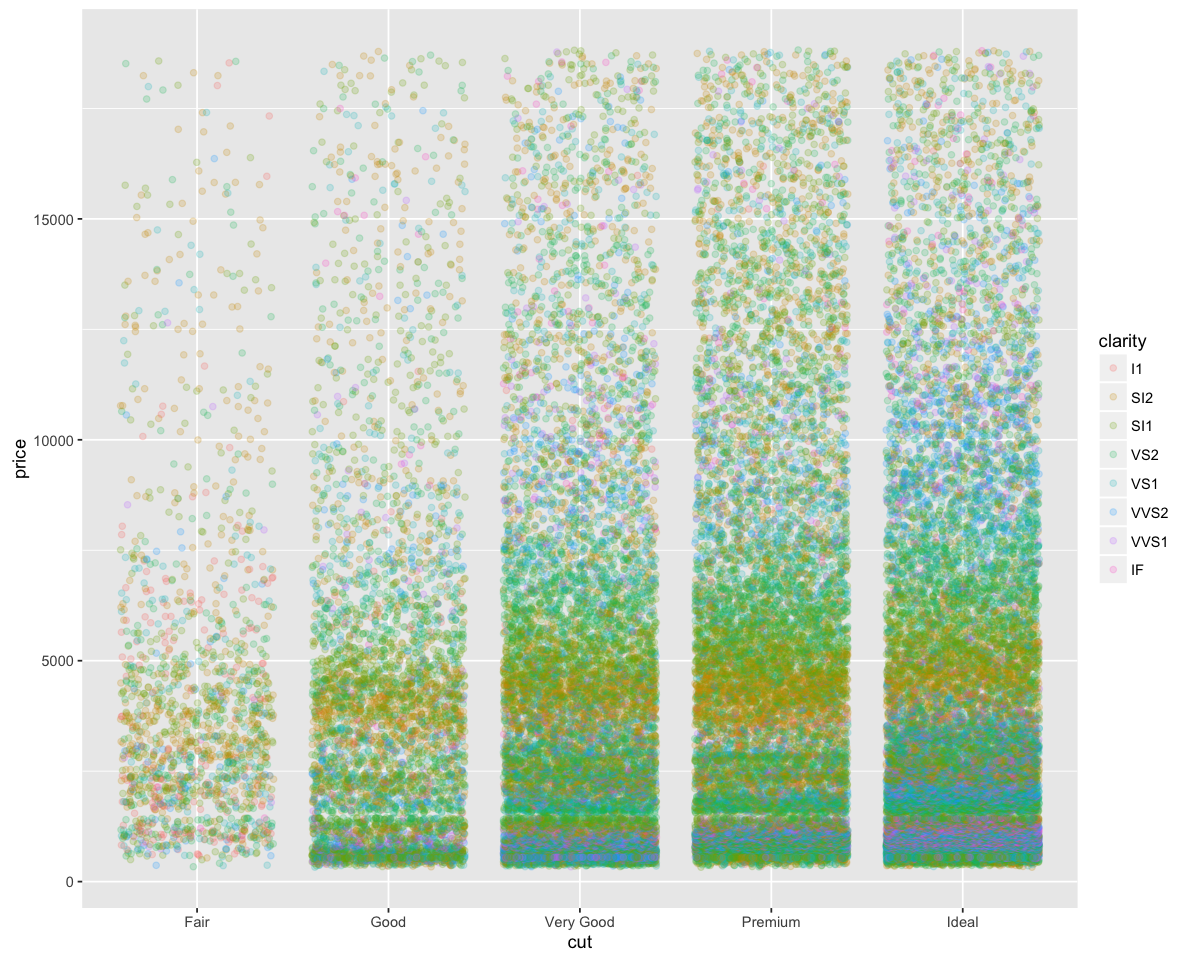

In [17]:
ggplot(diamonds, aes(x=cut, y=price, color=clarity)) + geom_jitter(alpha=0.2)

## Summary Wha?

In [18]:
give.n <- function(x){
   return(c(y = mean(x), label = length(x)))
}

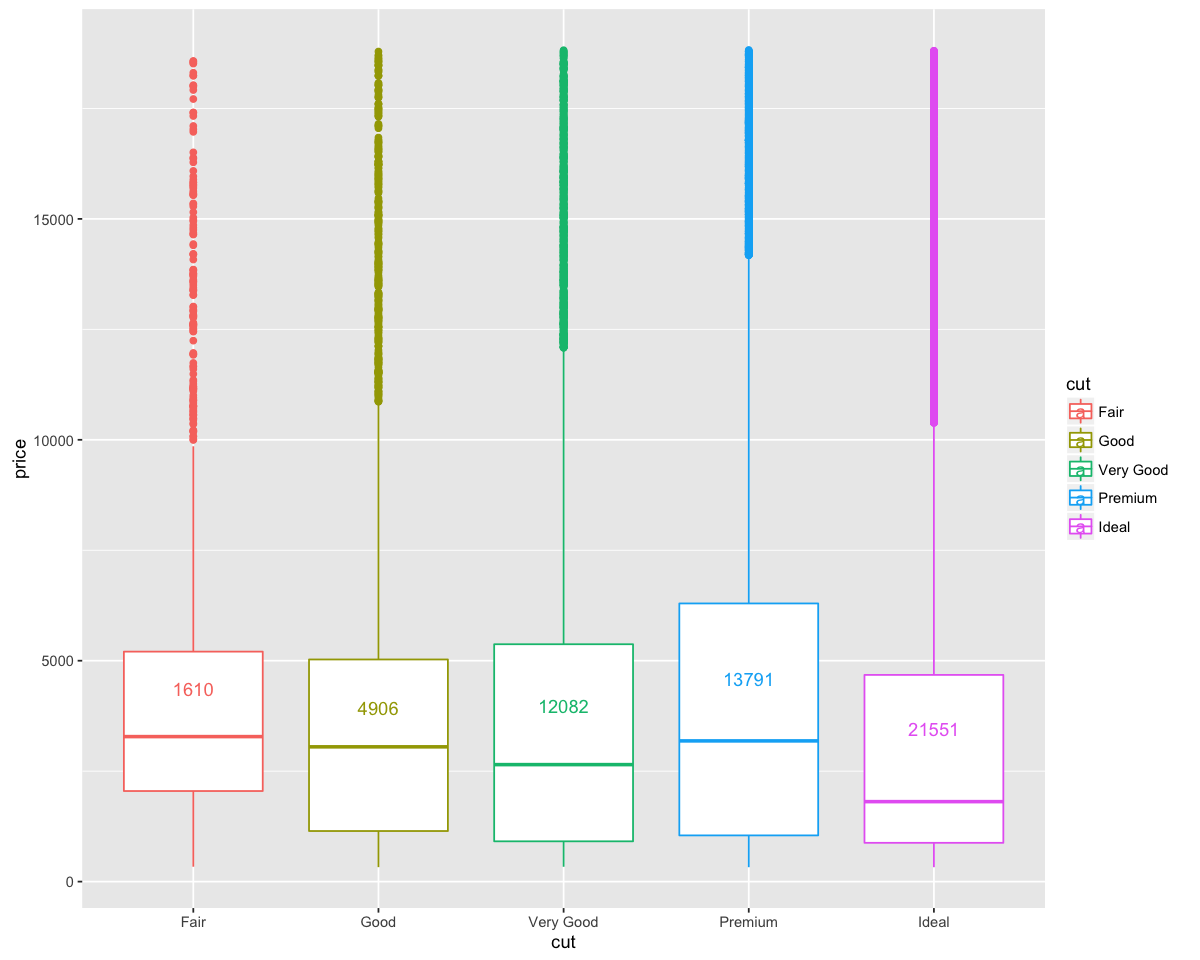

In [19]:
ggplot(diamonds, aes(x=cut, y=price, color=cut)) + 
    geom_boxplot() + 
   stat_summary(fun.data = give.n, geom = "text")

## Histogram

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


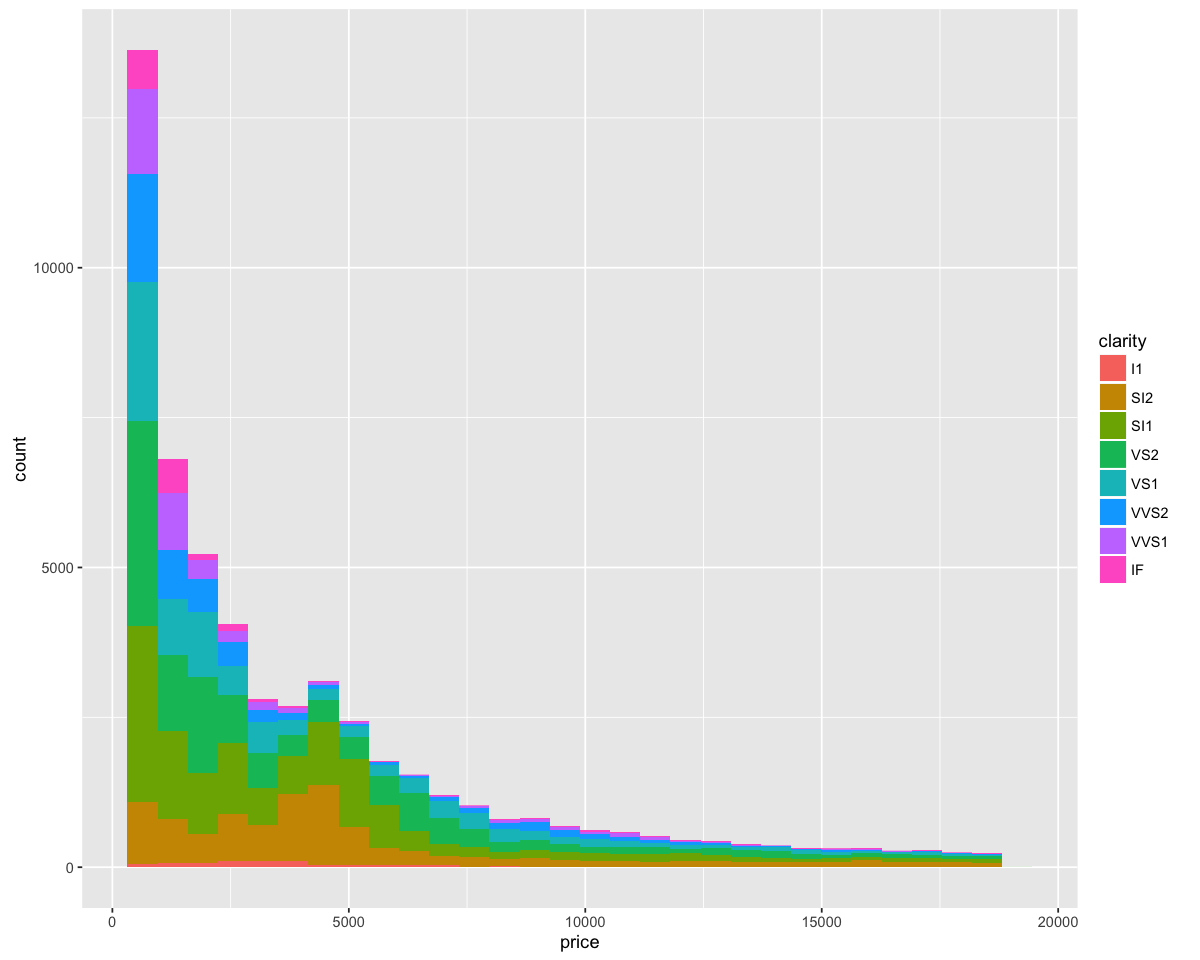

In [20]:
ggplot(diamonds, aes(x=price, fill=clarity)) + geom_histogram()

## Violin plot

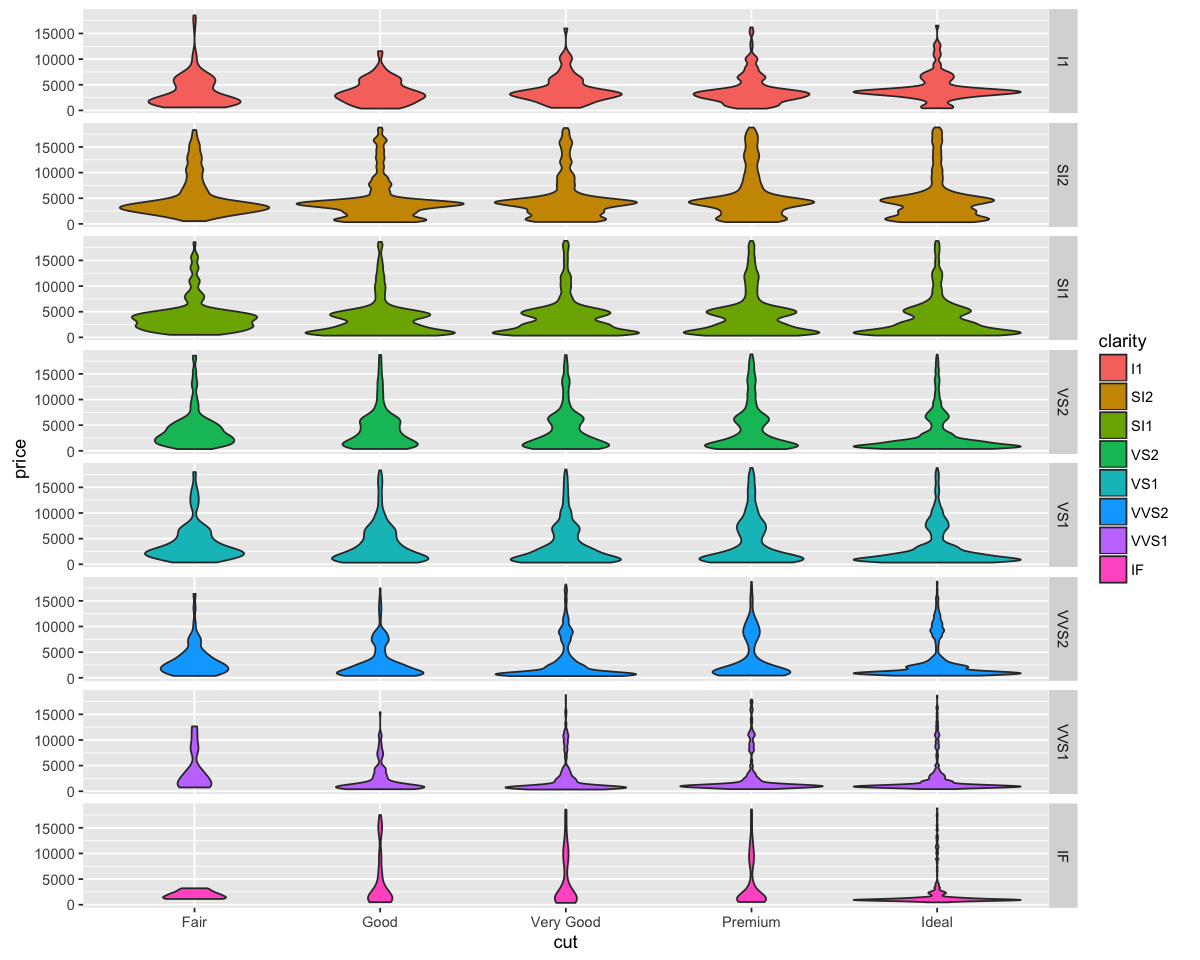

In [21]:
ggplot(diamonds, aes(x=cut, y=price, fill=clarity)) + geom_violin() + facet_grid(clarity~.)

corrmap

In [24]:
melt(cor(diamonds[, c('carat', 'price', 'depth', 'table')]))

Var1  Var2  value      
1  carat carat  1.00000000
2  price carat  0.92159130
3  depth carat  0.02822431
4  table carat  0.18161755
5  carat price  0.92159130
6  price price  1.00000000
7  depth price -0.01064740
8  table price  0.12713390
9  carat depth  0.02822431
10 price depth -0.01064740
11 depth depth  1.00000000
12 table depth -0.29577852
13 carat table  0.18161755
14 price table  0.12713390
15 depth table -0.29577852
16 table table  1.00000000

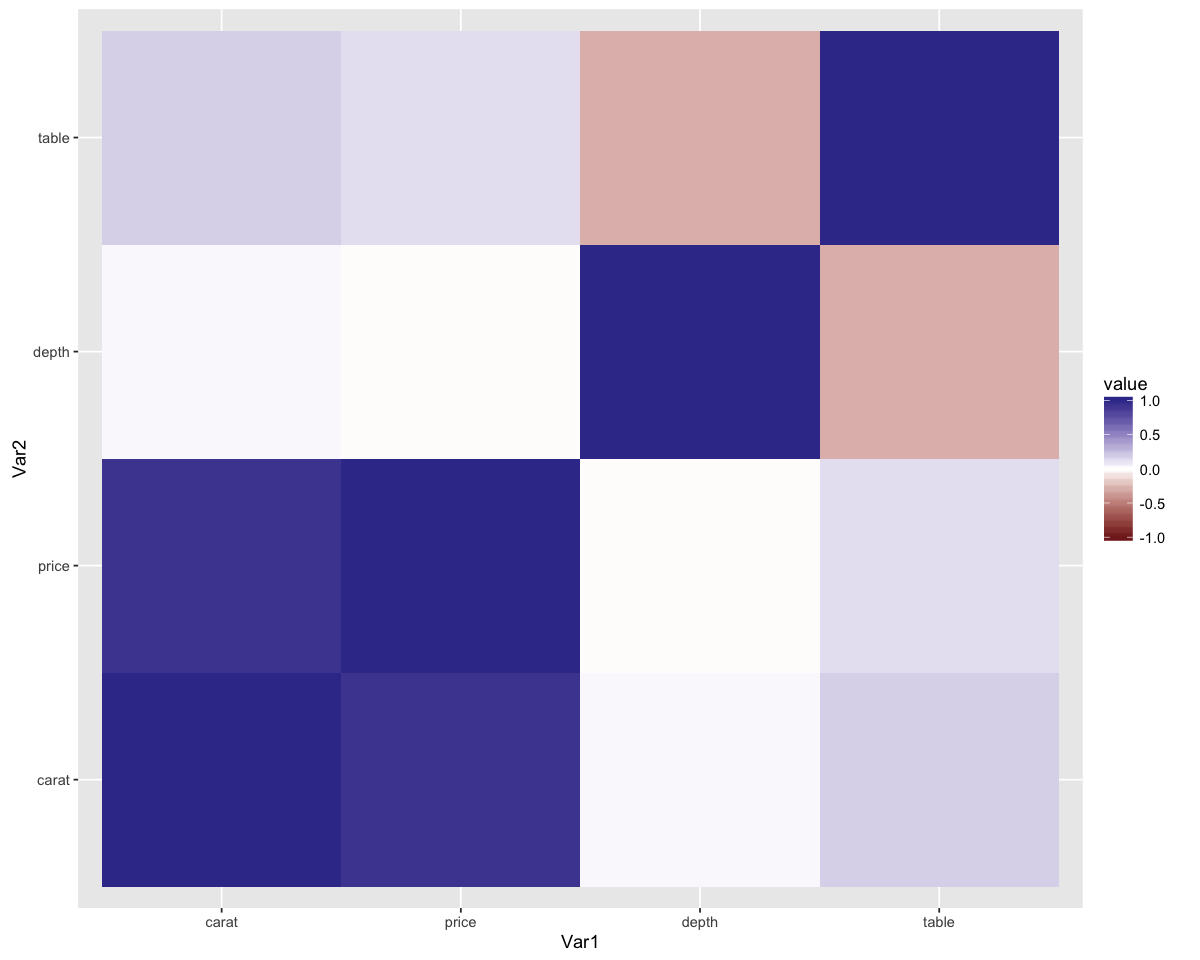

In [25]:
ggplot(melt(cor(diamonds[, c('carat', 'price', 'depth', 'table')])), aes(x= Var1, y= Var2, fill=value)) +
       geom_tile() +
       scale_fill_gradient2(limits=c(-1, 1))

## YARRR!

In [26]:
# library(devtools)
# install_github("ndphillips/yarrr")
library("yarrr")

Loading required package: jpeg
Loading required package: BayesFactor
Loading required package: coda
Loading required package: Matrix

Attaching package: ‘Matrix’

The following object is masked from ‘package:tidyr’:

    expand

************
Welcome to BayesFactor 0.9.12-2. If you have questions, please contact Richard Morey (richarddmorey@gmail.com).

Type BFManual() to open the manual.
************
************
Welcome to yarrr v0.1.3!
Run yarrr.guide() to see the main package guide
Email me at yarrr.book@gmail.com with questions, comments, or movie recommendations
************

Attaching package: ‘yarrr’

The following object is masked _by_ ‘.GlobalEnv’:

    diamonds

The following object is masked from ‘package:ggplot2’:

    diamonds



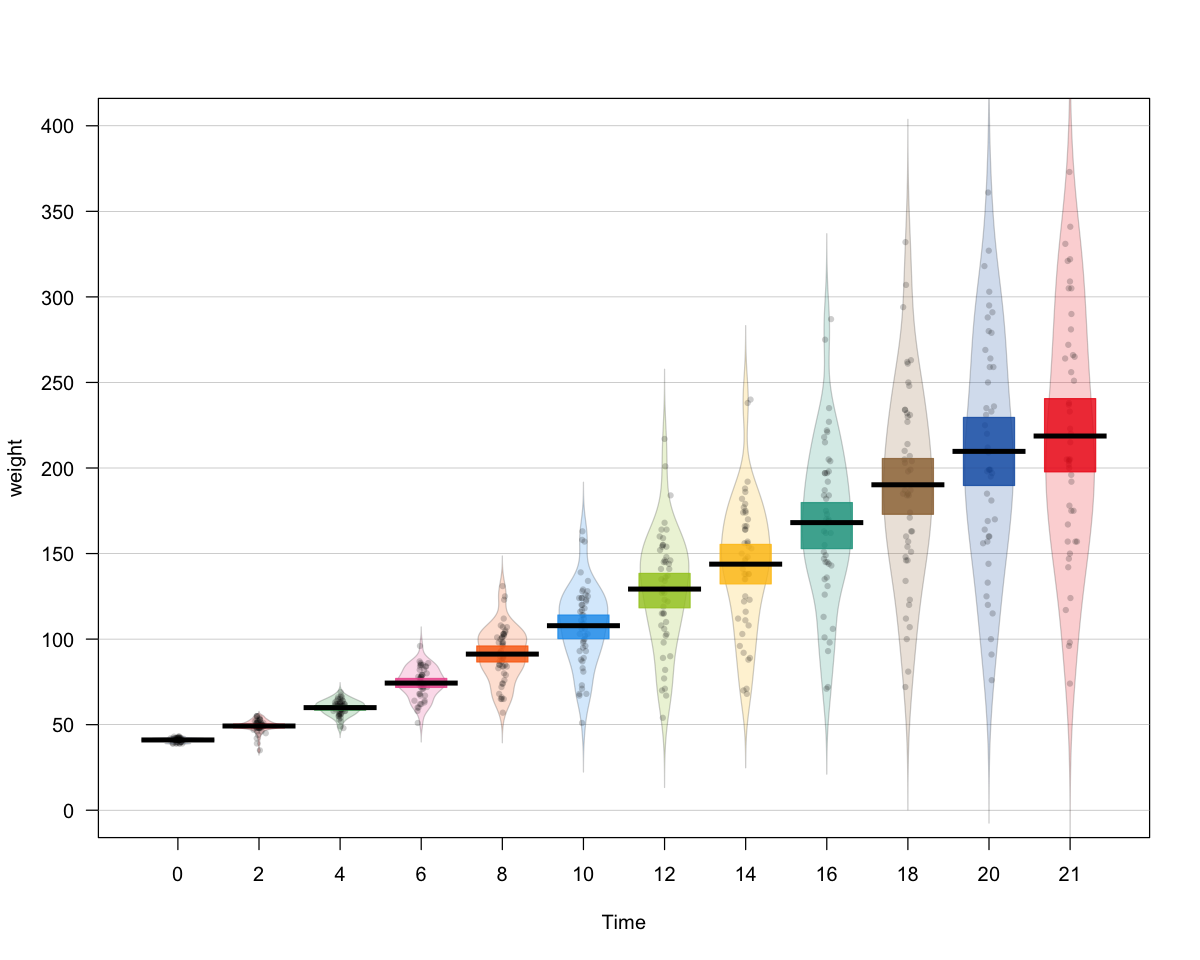

In [27]:
pirateplot(formula = weight ~ Time,
          data = ChickWeight)